<b>Problem explained</b>
<br>BlackWell ELectronics wanted to understand what to understand which computer manufacturer brand it’s customers liked more, if Sony or Acer.</br>
In that sense, they have conducted a survey which asked that question amongst other things, like age, level of education, salary, etc.
Unfortunately many customers skipped the most important question, and there’s where we have conducted a Linear Regression with two models to predict the those that were left unwersered. 


In [ ]:
library(caret)

In [15]:
#Load Data
completesurvey <- read.csv('C:/Users/Francisco Cardoso/Documents/UT Data Analytics/2Predicting Customer Preferences/Task 2/task2/CompleteResponses.csv',header = TRUE)

In [49]:
#Load Data
incompletesurvey <- read.csv('C:/Users/Francisco Cardoso/Documents/UT Data Analytics/2Predicting Customer Preferences/Task 2/task2/SurveyIncomplete.csv',header = TRUE)

<b>Data Exploration and Data Cleaning</b>

In [16]:
head(completesurvey)

salary,age,elevel,car,zipcode,credit,brand
<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
119806.54,45,0,14,4,442037.71,0
106880.48,63,1,11,6,45007.18,1
78020.75,23,0,15,2,48795.32,0
63689.94,51,3,6,5,40888.88,1
50873.62,20,3,14,4,352951.50,0
130812.74,56,3,14,3,135943.02,1


In [17]:
str(completesurvey)

'data.frame':	9898 obs. of  7 variables:
 $ salary : num  119807 106880 78021 63690 50874 ...
 $ age    : int  45 63 23 51 20 56 24 62 29 41 ...
 $ elevel : int  0 1 0 3 3 3 4 3 4 1 ...
 $ car    : int  14 11 15 6 14 14 8 3 17 5 ...
 $ zipcode: int  4 6 2 5 4 3 5 0 0 4 ...
 $ credit : num  442038 45007 48795 40889 352951 ...
 $ brand  : int  0 1 0 1 0 1 1 1 0 1 ...


In [18]:
summary(completesurvey)

     salary            age            elevel           car       
 Min.   : 20000   Min.   :20.00   Min.   :0.000   Min.   : 1.00  
 1st Qu.: 52082   1st Qu.:35.00   1st Qu.:1.000   1st Qu.: 6.00  
 Median : 84950   Median :50.00   Median :2.000   Median :11.00  
 Mean   : 84871   Mean   :49.78   Mean   :1.983   Mean   :10.52  
 3rd Qu.:117162   3rd Qu.:65.00   3rd Qu.:3.000   3rd Qu.:15.75  
 Max.   :150000   Max.   :80.00   Max.   :4.000   Max.   :20.00  
    zipcode          credit           brand       
 Min.   :0.000   Min.   :     0   Min.   :0.0000  
 1st Qu.:2.000   1st Qu.:120807   1st Qu.:0.0000  
 Median :4.000   Median :250607   Median :1.0000  
 Mean   :4.041   Mean   :249176   Mean   :0.6217  
 3rd Qu.:6.000   3rd Qu.:374640   3rd Qu.:1.0000  
 Max.   :8.000   Max.   :500000   Max.   :1.0000  

In [19]:
sum(is.na(completesurvey))

[1] 0

In [21]:
completesurvey$car <- as.factor(completesurvey$car)
completesurvey$brand <- as.factor(completesurvey$brand)
completesurvey$zipcode <- as.factor(completesurvey$zipcode)
completesurvey$elevel <- as.ordered(completesurvey$elevel)

In [22]:
str(completesurvey)

'data.frame':	9898 obs. of  7 variables:
 $ salary : num  119807 106880 78021 63690 50874 ...
 $ age    : int  45 63 23 51 20 56 24 62 29 41 ...
 $ elevel : Ord.factor w/ 5 levels "0"<"1"<"2"<"3"<..: 1 2 1 4 4 4 5 4 5 2 ...
 $ car    : Factor w/ 20 levels "1","2","3","4",..: 14 11 15 6 14 14 8 3 17 5 ...
 $ zipcode: Factor w/ 9 levels "0","1","2","3",..: 5 7 3 6 5 4 6 1 1 5 ...
 $ credit : num  442038 45007 48795 40889 352951 ...
 $ brand  : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 2 2 1 2 ...


<b>Create a Decision Tree C5.0 model</b>

In [ ]:
#load library and set seed
library(caret) 
set.seed(998) 

In [24]:
#create a 20% sample of the data
completesurveysample<- completesurvey[sample(1:nrow(completesurvey), 2000,replace=FALSE),] 

In [33]:
#define an 75%/25% train/test split of the dataset
inTraining <- createDataPartition(completesurveysample$brand, p = .75, list = FALSE)
training <- completesurveysample[inTraining,]
testing <- completesurveysample[-inTraining,]

In [35]:
#10 fold cross validation
fitControl <- trainControl(method = "repeatedcv", number = 10, repeats = 1)

In [36]:
#train C 5.0 with a tuneLenght = 1 
C5.0 <- train(brand~., data = training, method = "C5.0", trControl=fitControl, tuneLength = 1)

In [37]:
#training results
C5.0

C5.0 

1501 samples
   6 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1352, 1351, 1352, 1351, 1351, 1350, ... 
Resampling results across tuning parameters:

  model  winnow  Accuracy   Kappa    
  rules  FALSE   0.8367431  0.6531439
  rules   TRUE   0.8546728  0.6984464
  tree   FALSE   0.8240853  0.6227233
  tree    TRUE   0.8453439  0.6764647

Tuning parameter 'trials' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were trials = 1, model = rules and winnow
 = TRUE.

In [38]:
#Evaluate the importance of each varaible
importanceC5.0 <- varImp(C5.0,scale=FALSE) #estimate variable importance of the model
print(importanceC5.0) 

C5.0 variable importance

  only 20 most important variables shown (out of 34)

         Overall
salary    100.00
age        49.97
zipcode1    7.46
zipcode8    6.33
zipcode5    6.00
car13       5.60
zipcode7    5.60
elevel.C    1.93
car19       1.93
car14       0.87
elevel.L    0.00
car18       0.00
car4        0.00
car3        0.00
car2        0.00
car5        0.00
zipcode3    0.00
credit      0.00
elevel.Q    0.00
zipcode6    0.00


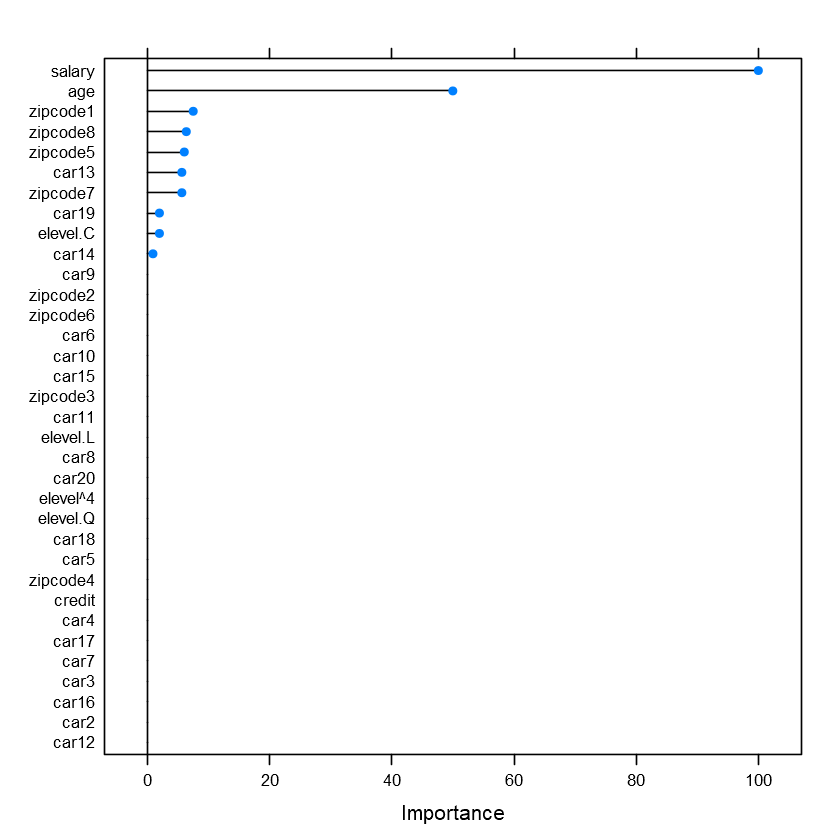

In [39]:
#plot importance
plot(importanceC5.0) 

<b> Create Random Forest with Manual Grid </b>

In [41]:
set.seed(998)

In [42]:
#dataframe for manual tuning of mtry
rfGrid <- expand.grid(mtry=c(1,2,3,4,5))

#train Random Forest Regression model
system.time(rfFitm1 <- train(brand~., data = training, method = "rf", trControl=fitControl, tuneGrid=rfGrid))


   user  system elapsed 
  75.19    1.01   76.72 

In [44]:
#training results
rfFitm1

Random Forest 

1501 samples
   6 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 1351, 1350, 1351, 1351, 1350, 1350, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
  1     0.6235872  0.00000000
  2     0.6415342  0.07158351
  3     0.7514790  0.42789508
  4     0.7974491  0.54967084
  5     0.8354454  0.64064102

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 5.

The model as an Accuracy of 83% and Kappa of 64% for the mtry = 5

In [45]:
#estimate variable importance of the model
importancefFitm1 <- varImp(rfFitm1,scale=FALSE)

In [56]:
#Adapt our testing data as our trainning data
incompletesurvey$car <- as.factor(incompletesurvey$car)
incompletesurvey$brand <- as.factor(incompletesurvey$brand)
incompletesurvey$zipcode <- as.factor(incompletesurvey$zipcode)
incompletesurvey$elevel <- as.ordered(incompletesurvey$elevel)

In [57]:
#Creates predictions with the best performing model
predictions <- predict(C5.0, incompletesurvey)
summary(predictions)

0    1 
2626 2374

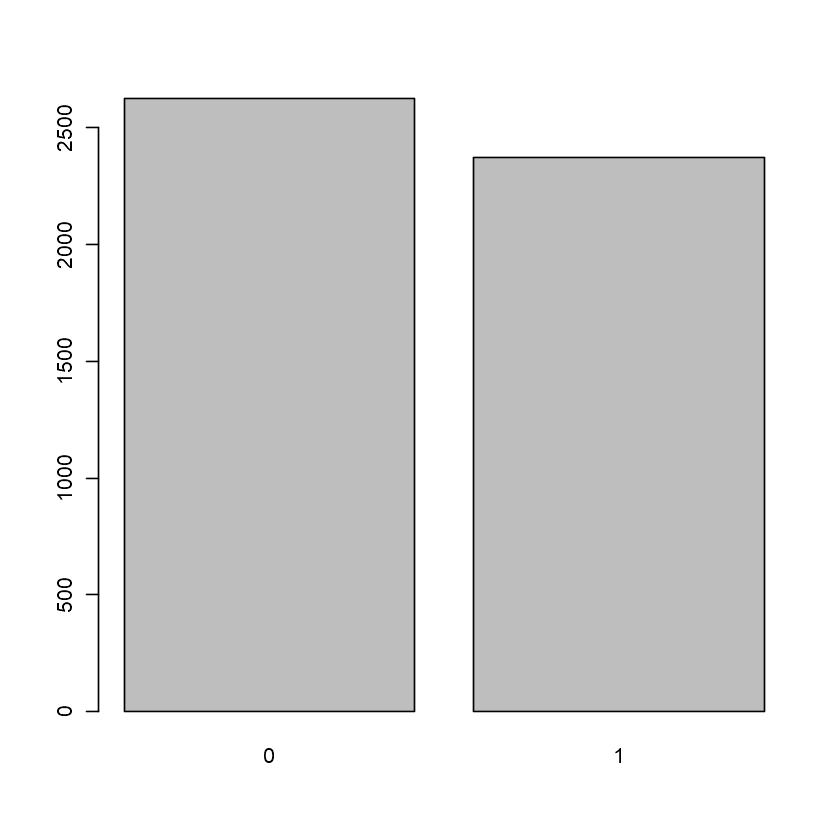

In [58]:
plot(predictions)

As seen on the graph the customers have a slight preference for Sony. 

<b> Create our model predictions and add it to the final table </b>

In [59]:
matrix(predictions) #creates a matrix with the values from pr

0    1 
2626 2374

predictions
   0    1 
2626 2374 

1
0
1
1
1
1
1
1
1
0
0


In [63]:
#Post Resample
postResample(incompletesurvey$brand, predictionsC5.0)

Accuracy       Kappa 
0.529000000 0.009328383

Our model;s performance on our testing data

In [65]:
#Add column to dataframe
predictionscolumn <- matrix(predictions) #Creates a column with the value of the predictions
incompletesurvey["brandpredictions"] <- NA #Creates the column with NAs
incompletesurvey$brandpredictions <- predictions #Adds the values from predictions to the dataframe

In [69]:
incompletesurveypredictions <- incompletesurvey

In [68]:
incompletesurvey["brandpredictions"] <- NA #Creates the column with NAs
incompletesurvey$brandpredictions <- predictions #Adds the values from predictions to the dataframe

In [70]:
write.csv(incompletesurveypredictions, file = "incompletesurveypredictions.csv")